# Cultivated area by crop (ha) in Senegal  2012-2016
## We will analyze the production of different type of crops in Senegal between 2012 and 2016

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading our data
data = pd.read_excel('Cultivated area by crop (ha) in Senegal  2012-2016.xlsx')

In [3]:
# The first 5 rows of our data
data.head()

,Crop types,2012,2013,2014,2015,2016
0,Mil,817471,754274,715996,922008,935232
1,Sorgho,143271,108803,125006,200737,220811
2,Maïs,147699,156576,146361,199502,219453
3,Arachides non décortiquées,708956,916750,878659,1135339,1212233
4,Niébé,129206,123111,153142,162990,571


In [4]:
# The last 5 rows of our data. We can also find sample of data by data.sample(10 or whatever number)
data.tail()

,Crop types,2012,2013,2014,2015,2016
5,Manioc,23600,20868,31394,40268,61127
6,Fonio,1796,2446,3286,4446,4758
7,Coton,33694,32230,25057,30593,20572
8,Riz,117729,108547,134973,237300,283501
9,Sésame,11319,7179,18190,20513,24123


In [5]:
len(data)

10

In [6]:
# Checking the different types of crops
[i for i in data['Crop types']]

['Mil',
 'Sorgho',
 'Maïs',
 'Arachides non décortiquées',
 'Niébé',
 'Manioc',
 'Fonio',
 'Coton',
 'Riz',
 'Sésame']

<AxesSubplot:>

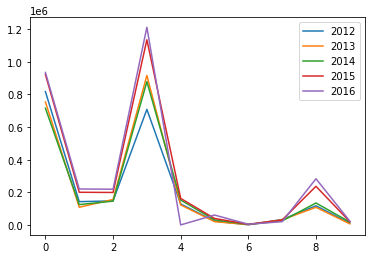

In [7]:
# First visualization of our data to get an idea
data.plot()

Total crop on the year of 2012


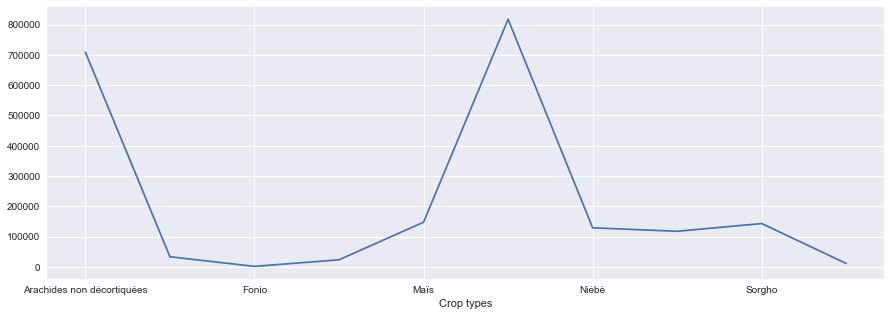

Total crop on the year of 2013


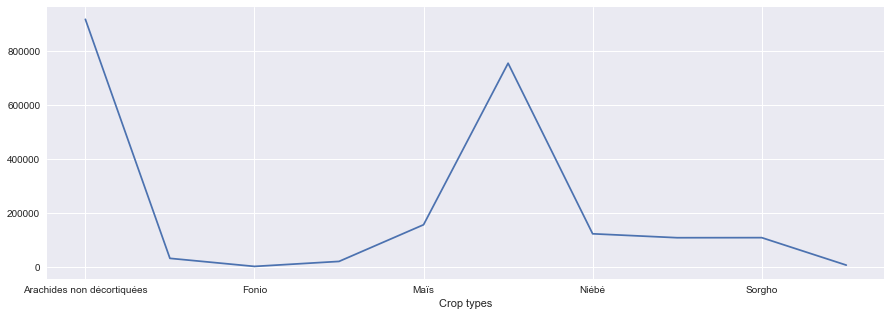

Total crop on the year of 2014


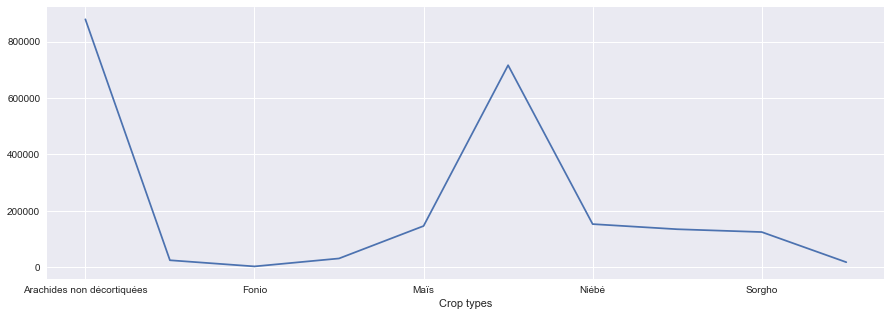

Total crop on the year of 2015


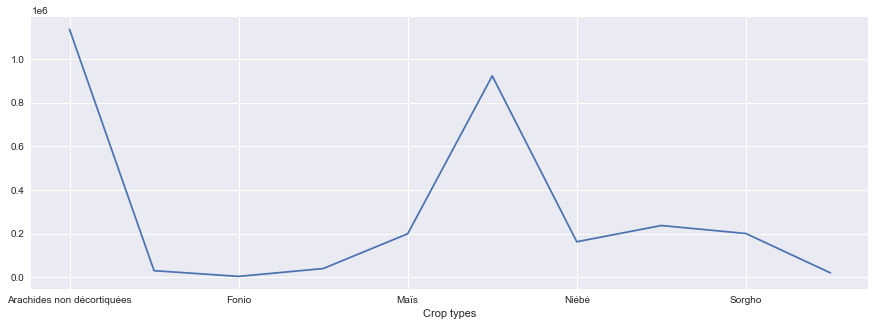

Total crop on the year of 2016


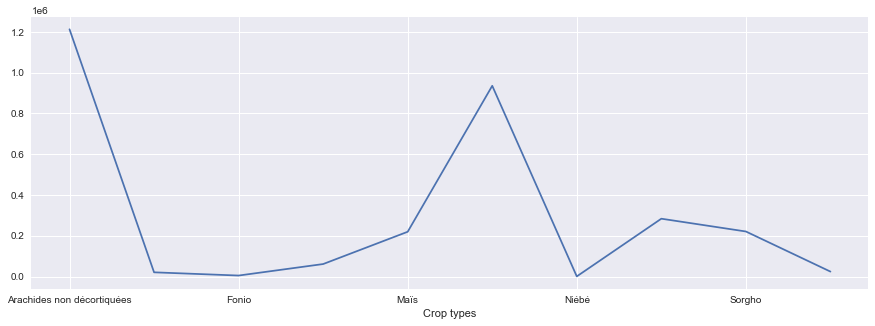

In [8]:
# total production on each year by crop
plt.style.use('seaborn')
for i in data.columns[1:]:
    print('Total crop on the year of {}'.format(i))
    data.groupby('Crop types')[i].sum().plot(kind = 'line', figsize = (15,5))
    plt.show()

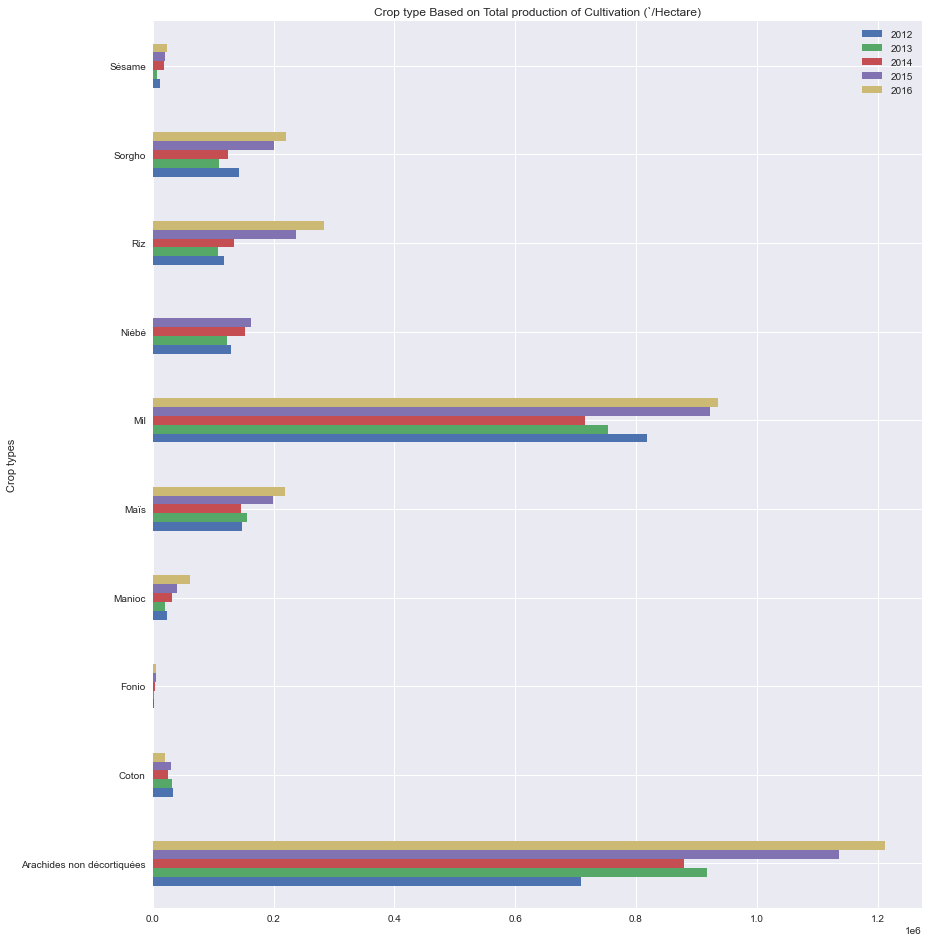

In [9]:
# Production of crop on each year evolution
data.groupby(['Crop types'])[[2012, 2013, 2014, 2015, 2016]].sum().sort_values(ascending = True, by = 'Crop types').plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop type Based on Total production of Cultivation (`/Hectare)')
plt.show()

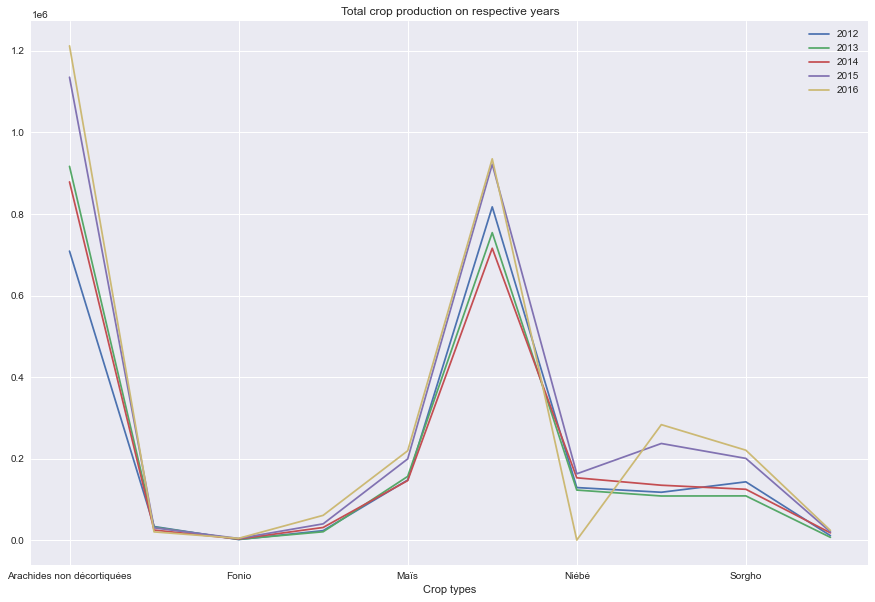

In [10]:
#  Total crop production on respective years
for i in data.columns[1:7]:
    data.groupby('Crop types')[i].sum().plot(kind = 'line', figsize = (15,10), legend = True)
    plt.title('Total crop production on respective years')
plt.show()

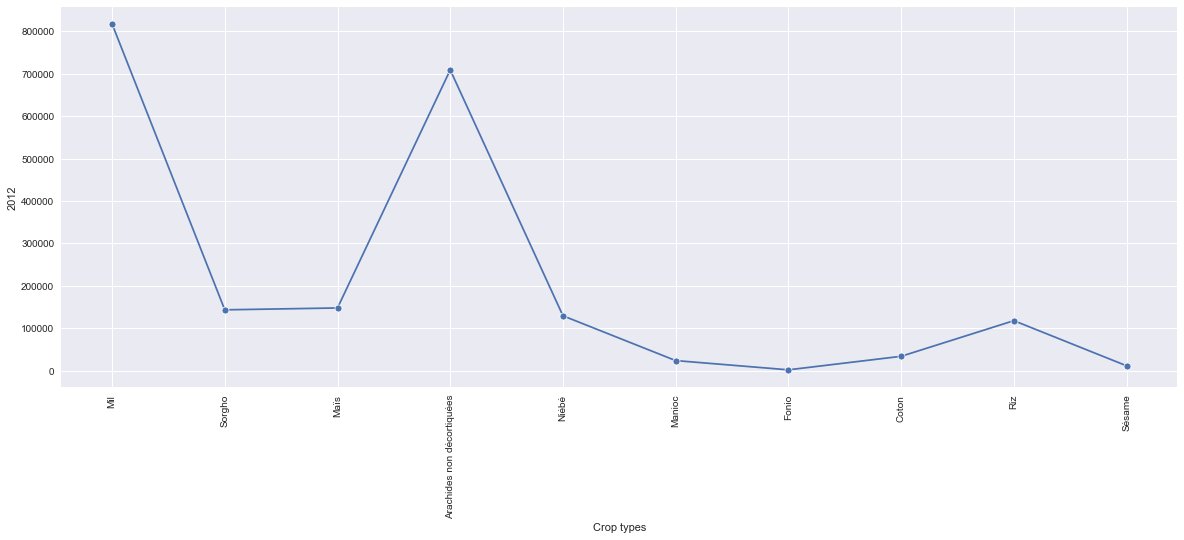

In [11]:
# Production for specific year
plt.figure(figsize=(20,7))
sns.lineplot(data=data,x='Crop types',y = data[2012], marker='o')
plt.xticks(rotation=90)
plt.show()

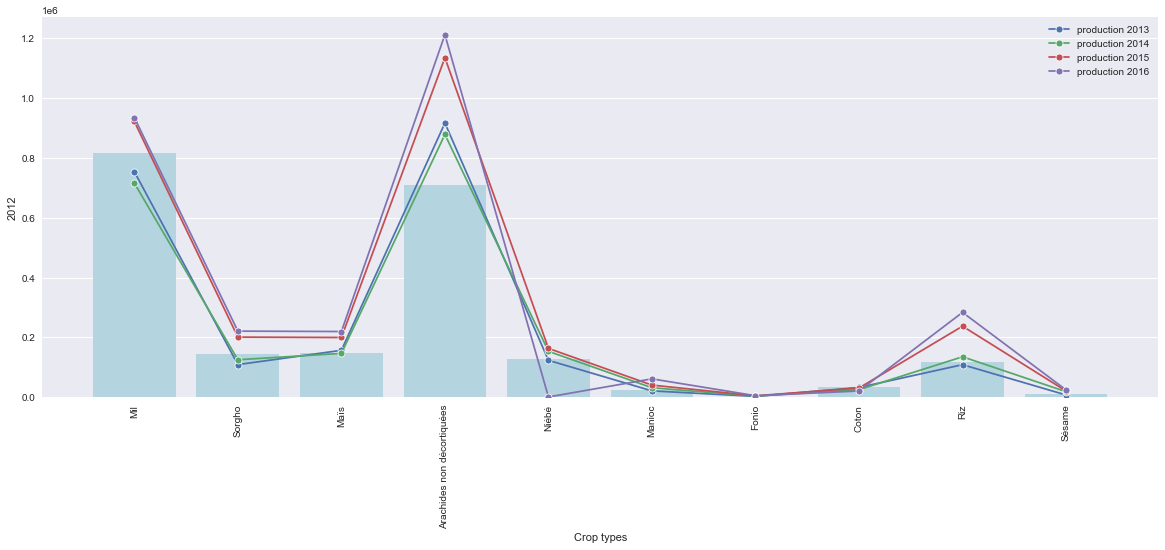

In [12]:
# Production increase based on specific year to other year 
plt.figure(figsize=(20,7))
sns.barplot(data=data,x="Crop types",y=data[2012],color='lightblue')
sns.lineplot(data=data,x="Crop types",y=data[2013],marker='o',label='production 2013')
sns.lineplot(data=data,x="Crop types",y=data[2014],marker='o',label='production 2014')
sns.lineplot(data=data,x="Crop types",y=data[2015],marker='o',label='production 2015')
sns.lineplot(data=data,x="Crop types",y=data[2016],marker='o',label='production 2016')
plt.xticks(rotation=90)
plt.show()

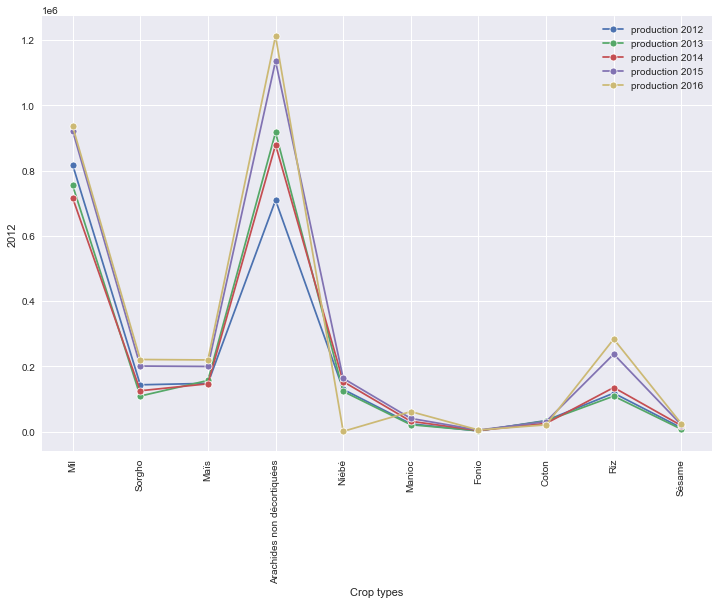

In [13]:
# Plotting our data to see the level of production of different crops
plt.figure(figsize=(12, 8))
sns.lineplot(data=data,x="Crop types",y=data[2012],marker='o',label='production 2012')
sns.lineplot(data=data,x="Crop types",y=data[2013],marker='o',label='production 2013')
sns.lineplot(data=data,x="Crop types",y=data[2014],marker='o',label='production 2014')
sns.lineplot(data=data,x="Crop types",y=data[2015],marker='o',label='production 2015')
sns.lineplot(data=data,x="Crop types",y=data[2016],marker='o',label='production 2016')
plt.xticks(rotation=90)
plt.show()

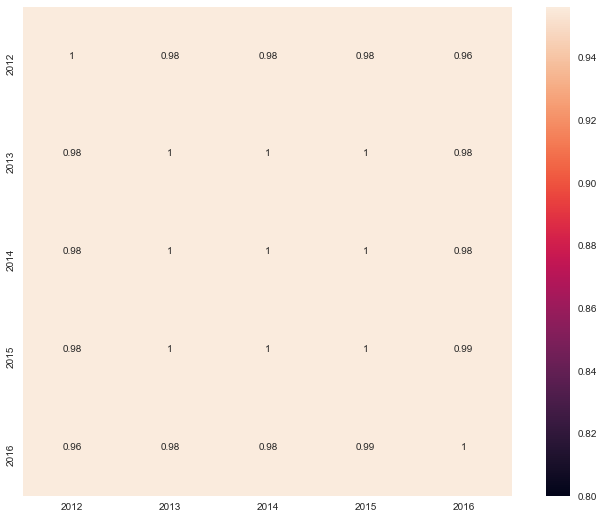

In [14]:
# Looking for correlation of our data
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [15]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [ ]:
#univariate analysis
import plotly.express as px
x=0
for i in data:
    #data = px.data.tips()
    fig = px.histogram(data, x=i, nbins=100, opacity=0.8,
                   color_discrete_sequence=[colors[x]])
    fig.show()
    x+=1

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
x=0
for i in data:
    plot_data = [
        go.Scatter(
            x=data['Crop types'],
            y=data[i],
            name=i,
            marker = dict(color = colors[x])
            #x_axis="OTI",
            #y_axis="time",
        )
    ]
    plot_layout = go.Layout(
            title=i,
            yaxis_title=i,
            xaxis_title='Crop types'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
x=0
plot_data=[]
for i in data:
    item= go.Scatter(
            x=data['Crop types'],
            y=data[i],
            name=i,
            marker = dict(color = colors[x])
            #x_axis="OTI",
            #y_axis="time",
        )
    plot_data.append(item)
    x+=1
plot_layout = go.Layout(
        title='Overlapped Crops production respectively',
        #yaxis_title=i,
        xaxis_title='Crop types'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## Conclusion
We can observe the important of 'Arachides non decortiquees' which is a pure peanut agriculture increase over years in Senegal. That specific crop is essential in Senegal for local consumption using it as oil and other, also it's exported with high quantities in different countries. Supporting farmers to develop more their activities on this types of crop is fondamental to boost their business activities. The three most importants regions of peanut production in Senegal are Kaffrine, Diourbel, Kaolack and Fatick. An earlier document has been analyze regarding the farming size owned by household per region in Senegal which describes the important of different regions based on the cultivation. 